In [1]:
from typing import List, Dict

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [2]:
filesuffixes = [
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    ]

In [3]:
filesuffixes = [
    '_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_all_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_3_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_5_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_10_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_all_RandomForestClassifier_ovar_cancer__15_trials',
    # TODO: either don't use these or make them single label
    # '_for_experiment_participants_screened_first_5_ca125_and_binary_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_ca125_binary_RandomForestClassifier_cancer_in_next_1_years__15_trials',
]

In [4]:
cv_analytics_utils = commonized_datasets(filesuffixes)

_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 230
_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 1084
_for_experiment_part

In [5]:
def find_non_intersection(list_of_arrays):
    if not list_of_arrays:
        return None

    # Start with the first array as the initial set of non-intersecting values
    non_intersection = set(list_of_arrays[0])

    # Iterate through the remaining arrays and find values that do not intersect
    for arr in list_of_arrays[1:]:
        non_intersection = non_intersection.symmetric_difference(arr)

    # Convert the result back to a list
    non_intersection = list(non_intersection)

    return non_intersection


X-axis -1 means that somewhere withing the next year person gets cancer. -2 means somewhere between year -1 and 0 person gets cancer.

While for patients who developed cancer, we alligned them by the year when they got cancer. So, what I did is that I looked at the people who got cancer within the first 5 years of the experiment and who got cancer within that period. I aligned them on the year they got cancer and calculated the average estimated probability of them getting cancer as predicted by model 1 year before actually getting cancer, 2 years before actually getting cancer and so on. This is what the result I got based on the dataset with questionnaire and screening data:

There is an interesting correlation, and we can see that the increase in the probability is non-linear. (I also included the standard deviation interval). On the other hand, the graph based on the same selection of individuals, but only using the questionnaire data, did not exhibit such characteristics:

For the individuals who did not develop cancer, they were alligned by the date of their last exam. Just to verify if there is no fluke, I tested this also on a general population and there is no correlation (they are just aligned based on the last observation)

In [7]:
cv_analytics_util = cv_analytics_utils['_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials']
threshold = cv_analytics_util.get_optimal_operating_point()
cv_analytics_util.update_thresholds(threshold)
cv_analytics_util.store_cv_results()
cv_analytics_util.display_graph()


per_thereshold_metrics = bucket_predictions_by_thresholds(cv_analytics_util)
# Predicting actual cancer probability using bucketing
print_df(per_thereshold_metrics)
title = f'Fraction of patients with cancer per bucket for those who develop it based on {based_on} using {classifier_name} classifier'
plot_threhold_probabilities(per_thereshold_metrics, title=title)
plt.show()



Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999835  | 0.000177772 | 0.999382   | 1         |
| recall__class_0    | 0.964367  | 0.00262191  | 0.958691   | 0.967268  |
| f1-score__class_0  | 0.981779  | 0.00135256  | 0.97886    | 0.983312  |
| precision__class_1 | 0.0161178 | 0.00502067  | 0.00589971 | 0.0232558 |
| recall__class_1    | 0.784524  | 0.229921    | 0.25       | 1         |
| f1-score__class_1  | 0.0315819 | 0.00981811  | 0.0115274  | 0.0454545 |
| accuracy           | 0.964234  | 0.00260474  | 0.958625   | 0.967192  |
| auc                | 0.931738  | 0.0752321   | 0.745356   | 0.998529  |
+--------------------+-----------+-------------+------------+-----------+




Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999848  | 0.000151176 | 0.999482   | 1         |
| recall__class_0    | 0.959605  | 0.00264428  | 0.954254   | 0.963725  |
| f1-score__class_0  | 0.979311  | 0.0013714   | 0.976542   | 0.981378  |
| precision__class_1 | 0.0145594 | 0.00374025  | 0.00769231 | 0.0202532 |
| recall__class_1    | 0.802381  | 0.19567     | 0.375      | 1         |
| f1-score__class_1  | 0.0285968 | 0.00733406  | 0.0150754  | 0.0397022 |
| accuracy           | 0.959489  | 0.00262914  | 0.954192   | 0.963452  |
| auc                | 0.931738  | 0.0752321   | 0.745356   | 0.998529  |
+--------------------+-----------+-------------+------------+-----------+
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


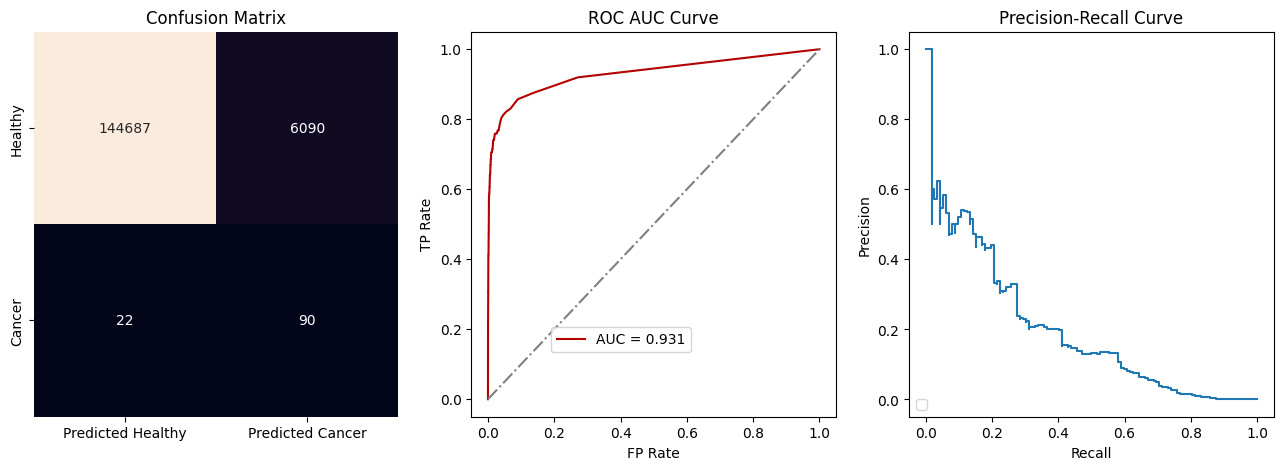

+---------------------------+---------+------------+------------+-------+-----------+-------+-------------+------------+
|                           |   count |       mean |        std |   min |       25% |   50% |         75% |        max |
|---------------------------+---------+------------+------------+-------+-----------+-------+-------------+------------|
| cancer_in_next_1_years_-6 |       8 | 0.00125    | 0.00248008 |     0 | 0         | 0     | 0.000833333 | 0.00666667 |
| cancer_in_next_1_years_-5 |      20 | 0.00766667 | 0.0239664  |     0 | 0         | 0     | 0.000833333 | 0.103333   |
| cancer_in_next_1_years_-4 |      36 | 0.0122222  | 0.0400476  |     0 | 0         | 0     | 0.00333333  | 0.213333   |
| cancer_in_next_1_years_-3 |      51 | 0.0130719  | 0.0384178  |     0 | 0         | 0     | 0.00666667  | 0.213333   |
| cancer_in_next_1_years_-2 |      75 | 0.0265778  | 0.0811479  |     0 | 0         | 0     | 0.00833333  | 0.446667   |
| cancer_in_next_1_years_-1 |   

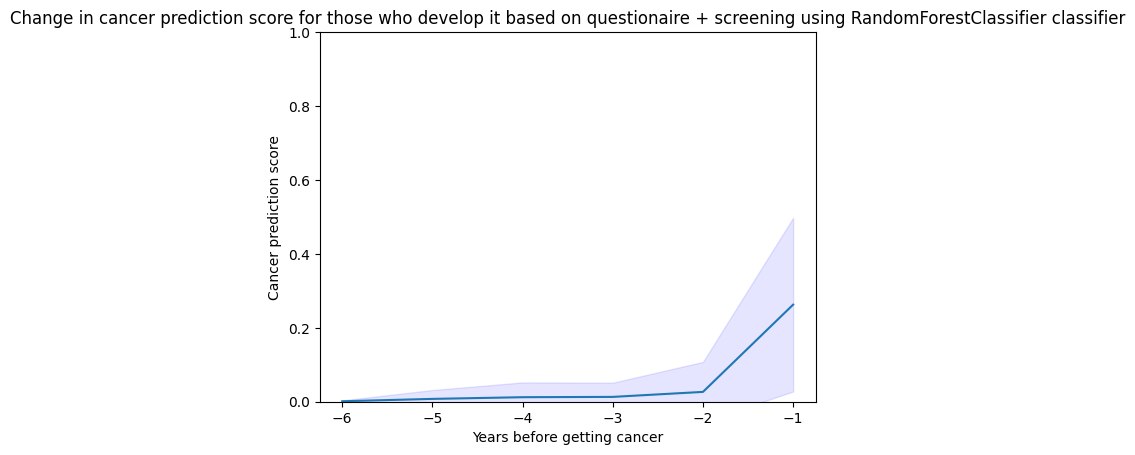

+---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------+
|                           |   count |       mean |       std |   min |   25% |   50% |        75% |      max |
|---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.00391045 | 0.017531  |     0 |     0 |     0 | 0.00333333 | 0.683333 |
| cancer_in_next_1_years_-5 |   22319 | 0.00384949 | 0.017233  |     0 |     0 |     0 | 0.00333333 | 0.56     |
| cancer_in_next_1_years_-4 |   25070 | 0.00387714 | 0.0169345 |     0 |     0 |     0 | 0.00333333 | 0.656667 |
| cancer_in_next_1_years_-3 |   26219 | 0.00450144 | 0.0197036 |     0 |     0 |     0 | 0.00333333 | 0.54     |
| cancer_in_next_1_years_-2 |   24683 | 0.00376845 | 0.0197443 |     0 |     0 |     0 | 0          | 0.713333 |
| cancer_in_next_1_years_-1 |   30552 | 0.00640733 | 0.0323829 |     0 |     0 |     0 | 0.00333

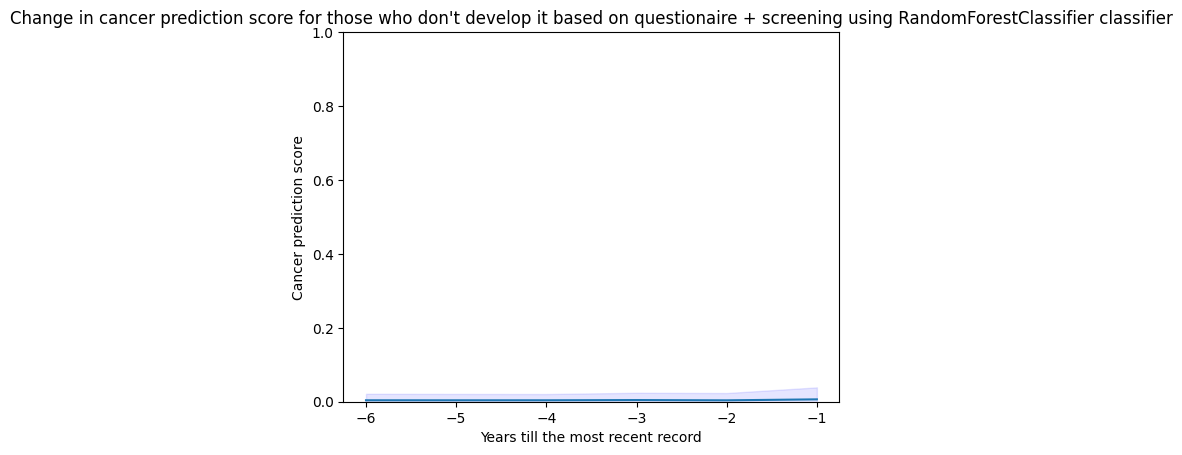

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |             112 |           150777 |               0 |                0 | 0.000742267 | 1        |             1        |           1           |                nan |                nan |            nan           |
|  1 |   0.0233333 |              88 |             5372 

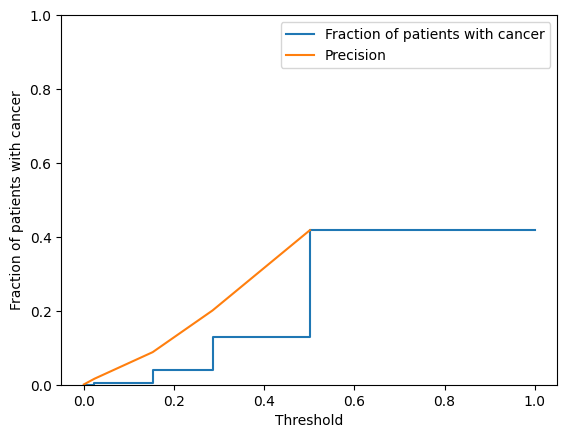

In [18]:
for filesuffix, cv_analytics_util in [('_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials', cv_analytics_utils['_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'])]:
    # Store CV Results
    cv_analytics_util.store_cv_results()

    # Defining labels
    print(filesuffix)
    label = cv_analytics_util.get_label()
    classifier_name = cv_analytics_util.get_classifier_type()
    based_on = 'questionaire'
    if 'screened' in filesuffix:
        based_on += ' + screening'

    
    # Predicting actual cancer probability using bucketing
    per_thereshold_metrics = bucket_predictions_by_thresholds(cv_analytics_util)

    # General Plots
    # threshold = cv_analytics_util.get_optimal_operating_point()
    # threshold = per_thereshold_metrics.loc[1, 'Threshold']
    threshold = 0.02
    print(f"Threshold: {threshold}")
    cv_analytics_util.update_thresholds(threshold)
    cv_analytics_util.get_cv_report();
    # cv_analytics_util.store_cv_results()
    cv_analytics_util.display_graph()
    
    # Change in cancer probability over years
    full_dataset = cv_analytics_util.get_dataset_with_predictions()
    full_dataset_cancer = extract_full_dataset_filter_cancer(full_dataset)
    full_dataset_no_cancer = extract_full_dataset_filter_no_cancer(full_dataset)

    title_caner = f'Change in cancer prediction score for those who develop it based on {based_on} using {classifier_name} classifier'
    title_no_caner = f'Change in cancer prediction score for those who don\'t develop it based on {based_on} using {classifier_name} classifier'

    if label == 'cancer_in_next_1_years':
        plot_change_in_confidence(full_dataset_cancer, title=title_caner, label=label)
        plt.show()
        plot_change_in_confidence(full_dataset_no_cancer, title=title_no_caner, label=label, xlabel="Years till the most recent record")
        plt.show()

    # Predicting actual cancer probability using bucketing
    print_df(per_thereshold_metrics)
    title = f'Fraction of patients with cancer per bucket for those who develop it based on {based_on} using {classifier_name} classifier'
    plot_threhold_probabilities(per_thereshold_metrics, title=title)
    plt.show()

In [9]:
per_thereshold_metrics.to_csv(f'./per_threshold_metrics/{filesuffix}.csv')